In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk


#reading the data
data = pd.read_csv("Experimental values.csv")
data.head()

,S. No.,Velocity (m/min),Load (N),Cooling Conditions,Coefficient of friction,Frictional force (N),Wear(micrometer)
0,1,1,10,Dry,0.528,5.4,177
1,2,2,10,Dry,0.119,3.5,805
2,3,3,10,Dry,0.142,4.6,1103
3,4,1,20,Dry,0.173,8.1,539
4,5,2,20,Dry,0.190,7.4,1070


In [2]:
data

,S. No.,Velocity (m/min),Load (N),Cooling Conditions,Coefficient of friction,Frictional force (N),Wear(micrometer)
0,1,1,10,Dry,0.528,5.4,177
1,2,2,10,Dry,0.119,3.5,805
2,3,3,10,Dry,0.142,4.6,1103
3,4,1,20,Dry,0.173,8.1,539
4,5,2,20,Dry,0.190,7.4,1070
5,6,3,20,Dry,0.198,7.5,711
6,7,1,30,Dry,0.167,8.3,291
7,8,2,30,Dry,0.309,11.3,1497
8,9,3,30,Dry,0.332,7.4,1666
9,10,1,10,Wet soluble,0.040,2.0,266


In [3]:
#removing the first column i.e S.No
data.drop('S. No.', axis=1, inplace=True)

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Velocity (m/min)         45 non-null     int64  
 1   Load (N)                 45 non-null     int64  
 2   Cooling Conditions       45 non-null     object 
 3   Coefficient of friction  45 non-null     float64
 4   Frictional force (N)     45 non-null     float64
 5   Wear(micrometer)         45 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.2+ KB


<Axes: >

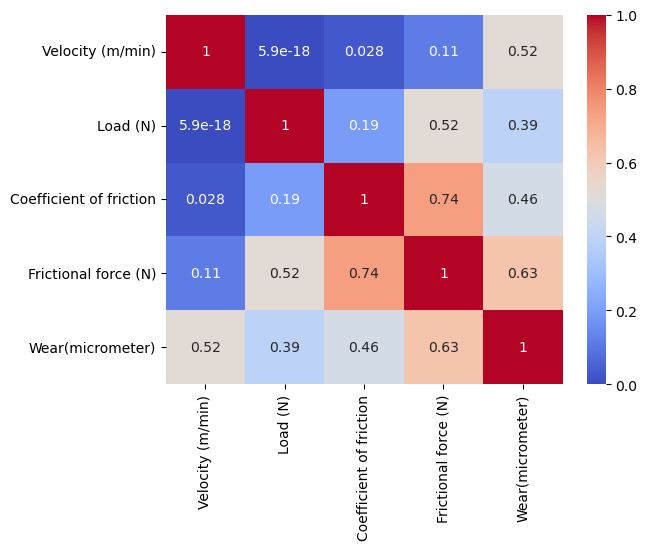

In [6]:
import seaborn as sns
cor = data.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap='coolwarm')

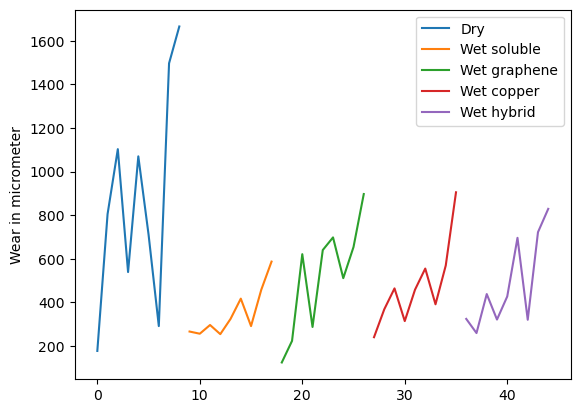

In [7]:
for con in data["Cooling Conditions"].unique():
    wear = data[data["Cooling Conditions"] == con]["Wear(micrometer)"]
    plt.plot(wear, label=con)
plt.ylabel("Wear in micrometer")
plt.legend()
plt.show()

In [8]:
data["Cooling Conditions"].value_counts()

Cooling Conditions
Dry             9
Wet soluble     9
Wet graphene    9
Wet copper      9
Wet hybrid      9
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,0:3]
y1=data.iloc[:,3]
y2=data.iloc[:,4]
y3=data.iloc[:,5]

In [10]:
x= pd.get_dummies(x, columns=["Cooling Conditions"], drop_first=True)


In [28]:
# predicting the coefficient of friction
# specified the stratify parameter to ensure that the all the cooling conditions exist in test data

x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,stratify=data["Cooling Conditions"],random_state=0)

In [29]:
x_test

,Velocity (m/min),Load (N),Cooling Conditions_Wet copper,Cooling Conditions_Wet graphene,Cooling Conditions_Wet hybrid,Cooling Conditions_Wet soluble
11,3,10,False,False,False,True
9,1,10,False,False,False,True
33,1,30,True,False,False,False
3,1,20,False,False,False,False
25,2,30,False,True,False,False
37,2,10,False,False,True,False
34,2,30,True,False,False,False
44,3,30,False,False,True,False
8,3,30,False,False,False,False


In [30]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


def build_model(model,name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(name)
    print("Training Score: ",model.score(x_train,y_train))    
    print("Testing Score: ",model.score(x_test,y_test))
    print("Mean squared error: ",mean_squared_error(y_test,y_pred))
    print("\n")


In [31]:
build_model(LinearRegression(),"Linear Regression")
alpha = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in alpha:
    build_model(Ridge(alpha=i),"Ridge alpha: "+str(i))
for i in alpha:
    build_model(Lasso(alpha=i),"Lasso alpha: "+str(i))

build_model(DecisionTreeRegressor(),"Decision Tree")

build_model(RandomForestRegressor(),"Random Forest")

build_model(GradientBoostingRegressor(),"Gradient Boosting")

build_model(SVR(),"Support Vector Regression")


Linear Regression
Training Score:  0.5855429565964049
Testing Score:  0.7788074922280389
Mean squared error:  0.0017415114214377702


Ridge alpha: 0.1
Training Score:  0.5830296412294078
Testing Score:  0.7763933814202701
Mean squared error:  0.0017605184013155875


Ridge alpha: 0.2
Training Score:  0.5767036625651925
Testing Score:  0.7687201578797296
Mean squared error:  0.0018209318690668248


Ridge alpha: 0.3
Training Score:  0.5679193205309585
Testing Score:  0.7576406944693812
Mean squared error:  0.001908163630516972


Ridge alpha: 0.4
Training Score:  0.5575874826679303
Testing Score:  0.7444025115125973
Mean squared error:  0.002012391603925954


Ridge alpha: 0.5
Training Score:  0.5463276662928012
Testing Score:  0.7298551812695464
Mean squared error:  0.0021269268656528956


Ridge alpha: 0.6
Training Score:  0.5345644464173546
Testing Score:  0.7145818509451334
Mean squared error:  0.0022471781321685737


Lasso alpha: 0.1
Training Score:  0.0
Testing Score:  -0.0764118106865

Out of all the models, we got good score from LinearRegressiona and RidgeRegression with alpha with 0.1 

In [33]:
ridge = Ridge(alpha=0.01)
ridge.fit(x,y1)
y_pred = ridge.predict(x_test)
print("Ridge")
print("Training Score: ",ridge.score(x_train,y_train))

print("Testing Score: ",ridge.score(x_test,y_test))

with open("./full-data/coeefficent-of-friction-with-ridge.pkl","wb") as file:
    pk.dump(ridge,file)

Ridge
Training Score:  0.5789177688516328
Testing Score:  0.8571067855801591


In [34]:
lr = LinearRegression()

lr.fit(x,y1)
print("Linear Regression")
print("Training Score: ",lr.score(x_train,y_train))
print("Testing Score: ",lr.score(x_test,y_test))

with open("./full-data/coeefficent-of-friction-with-linear-regression.pkl","wb") as file:
    pk.dump(lr,file)

Linear Regression
Training Score:  0.5790144100258974
Testing Score:  0.8567556724970132


In [35]:
# prediction of Frictional Force
x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,stratify=data["Cooling Conditions"],random_state=0)

In [36]:
build_model(LinearRegression(),"Linear Regression")
alpha = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in alpha:
    build_model(Ridge(alpha=i),"Ridge alpha: "+str(i))
for i in alpha:
    build_model(Lasso(alpha=i),"Lasso alpha: "+str(i))

build_model(DecisionTreeRegressor(),"Decision Tree")

build_model(RandomForestRegressor(),"Random Forest")

build_model(GradientBoostingRegressor(),"Gradient Boosting")

build_model(SVR(),"Support Vector Regression")


Linear Regression
Training Score:  0.8151186187593696
Testing Score:  0.7819287446287863
Mean squared error:  1.1057558766180853


Ridge alpha: 0.1
Training Score:  0.8127714897694893
Testing Score:  0.7918498897237278
Mean squared error:  1.0554495468230922


Ridge alpha: 0.2
Training Score:  0.8068632051427521
Testing Score:  0.7954566777629348
Mean squared error:  1.0371609050519432


Ridge alpha: 0.3
Training Score:  0.7986578875936698
Testing Score:  0.7947072998718948
Mean squared error:  1.0409607135384613


Ridge alpha: 0.4
Training Score:  0.7890057966257549
Testing Score:  0.7909483655832229
Mean squared error:  1.0600208307118355


Ridge alpha: 0.5
Training Score:  0.778485266381617
Testing Score:  0.7851196619024998
Mean squared error:  1.089575956338337


Ridge alpha: 0.6
Training Score:  0.767492683157804
Testing Score:  0.7778850424652677
Mean squared error:  1.1262599426995712


Lasso alpha: 0.1
Training Score:  0.6357068829910979
Testing Score:  0.69414381744367
Mean s

In [37]:
# final model for frictional force
ridge = Ridge(alpha=0.21)
ridge.fit(x,y2)

y_pred = ridge.predict(x_test)
print("Ridge")
print("Training Score: ",ridge.score(x_train,y_train))
print("Testing Score: ",ridge.score(x_test,y_test))
print("Mean squared error: ",mean_squared_error(y_test,y_pred))




Ridge
Training Score:  0.7996847056267191
Testing Score:  0.8709693934298609
Mean squared error:  0.6542648238331792


In [38]:

with open("./full-data/frictional-force-with-ridge.pkl","wb") as file:
    pk.dump(ridge,file)

In [39]:
# prediction of Wear
x_train,x_test,y_train,y_test=train_test_split(x,y3,test_size=0.2,stratify=data["Cooling Conditions"],random_state=0)


In [40]:
build_model(LinearRegression(),"Linear Regression")
alpha = [0.1,0.2,0.3,0.4,0.5,0.6]
for i in alpha:
    build_model(Ridge(alpha=i),"Ridge alpha: "+str(i))
for i in alpha:
    build_model(Lasso(alpha=i),"Lasso alpha: "+str(i))

build_model(DecisionTreeRegressor(),"Decision Tree")

build_model(RandomForestRegressor(),"Random Forest")

build_model(GradientBoostingRegressor(),"Gradient Boosting")

build_model(SVR(),"Support Vector Regression")


Linear Regression
Training Score:  0.6746116382931404
Testing Score:  0.7746536370628634
Mean squared error:  39055.02854548287


Ridge alpha: 0.1
Training Score:  0.6734934085111399
Testing Score:  0.7636464915830767
Mean squared error:  40962.68915874633


Ridge alpha: 0.2
Training Score:  0.6706734239040093
Testing Score:  0.7529163871270982
Mean squared error:  42822.33548435026


Ridge alpha: 0.3
Training Score:  0.6667485378941531
Testing Score:  0.7425868857647157
Mean squared error:  44612.55284268851


Ridge alpha: 0.4
Training Score:  0.6621205829458225
Testing Score:  0.732717746658978
Mean squared error:  46322.984306814


Ridge alpha: 0.5
Training Score:  0.6570632259822351
Testing Score:  0.7233307788560135
Mean squared error:  47949.85012671003


Ridge alpha: 0.6
Training Score:  0.6517643521243679
Testing Score:  0.7144253611498507
Mean squared error:  49493.25796427366


Lasso alpha: 0.1
Training Score:  0.6745994466903296
Testing Score:  0.7734866268037122
Mean square

# lasso and linear both performed well on test data


In [41]:
# first we try with lasso
alpha = np.arange(0.01,0.1,0.01)
lasso = Lasso()
for i in alpha:
    build_model(Lasso(alpha=i),"Lasso alpha: "+str(i))


Lasso alpha: 0.01
Training Score:  0.6746115161149575
Testing Score:  0.7745374426622866
Mean squared error:  39075.16632615171


Lasso alpha: 0.02
Training Score:  0.6746111509361383
Testing Score:  0.7744214606810191
Mean squared error:  39095.26729219404


Lasso alpha: 0.03
Training Score:  0.6746105387024498
Testing Score:  0.7743046258823404
Mean squared error:  39115.51606096951


Lasso alpha: 0.04
Training Score:  0.6746096935718529
Testing Score:  0.7741893320214684
Mean squared error:  39135.4977681015


Lasso alpha: 0.05
Training Score:  0.6746085814560234
Testing Score:  0.7740709802355049
Mean squared error:  39156.00944762883


Lasso alpha: 0.060000000000000005
Training Score:  0.6746072522218343
Testing Score:  0.7739554038709524
Mean squared error:  39176.04011578761


Lasso alpha: 0.06999999999999999
Training Score:  0.6746056836717779
Testing Score:  0.7738396868661426
Mean squared error:  39196.09515846566


Lasso alpha: 0.08
Training Score:  0.6746038758058539
Testin

In [42]:
lasso=Lasso(alpha=0.01)
lasso.fit(x,y3)
with open("./full-data/wear-with-lasso.pkl","wb") as file:
    pk.dump(lasso,file)

In [43]:
#linear Regression 
lr = LinearRegression()
lr.fit(x,y3)
y_pred = lr.predict(x_test)
print("Linear Regression")
print("Training Score: ",lr.score(x_train,y_train))
print("Testing Score: ",lr.score(x_test,y_test))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
r2_score(y_test,y_pred)

Linear Regression
Training Score:  0.6674058004537713
Testing Score:  0.8076378362848038
Mean Squared Error:  33338.50032921813
Mean Absolute Error:  125.73333333333332


0.8076378362848038

In [44]:
with open("./full-data/wear-with-linear-regression.pkl","wb") as file:
    pk.dump(lr,file)

In [27]:
# final models
# for coefficient of friction prediction we go with Ridge with alpha = 0.01 and LinearRegression
# for frictional force prediction we go with  Ridge with alpha = 0.21
# for wear prediction we go with Lasso with alpha = 0.01 and LinearRegression



In [45]:
import xgboost


ModuleNotFoundError: No module named 'xgboost'